# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [1]:
# Imports
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import matplotlib as mpl
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [2]:
# Example file location
filename3 = 'data_pendulum_example/andrew.dat'
filename2 = 'data_pendulum_example/nicolai.dat'
filename1 = 'data_pendulum_example/andreas.dat'
filename4 = 'data_pendulum_example/Frederik.dat'

## Data reader

In [3]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

[(0, 75.991), (0, 26.0)]

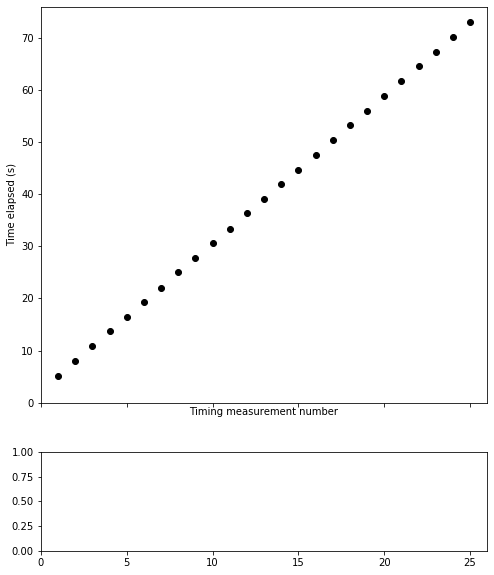

In [4]:
data_example = read_data(filename1)
n, t = data_example['n'], data_example['t_s']

# Plotting
sig_t = 0.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10),
                       gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
# ax[0].plot(n_plot, t_plot3)
ax[0].set_xlabel('Timing measurement number')
ax[0].set_ylabel('Time elapsed (s)')
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))


In [5]:
data_1 = read_data(filename1)
data_2 = read_data(filename2)
data_3 = read_data(filename3)
data_4 = read_data(filename4)
n1, t1 = data_1['n'], data_1['t_s']
n2, t2 = data_2['n'], data_2['t_s']
n3, t3 = data_3['n'], data_3['t_s']
n4, t4 = data_4['n'], data_4['t_s']

for i in range(len(t1)):
    print(n1[i], '&', t1[i], '&', t2[i], '&', t3[i], '&', t4[i], '\\','\\')

1.0 & 5.1696 & 1.6408 & 1.744 & 4.9024 \ \
2.0 & 7.9872 & 4.3528 & 4.5889 & 7.7098 \ \
3.0 & 10.8217 & 7.2369 & 7.5071 & 10.4847 \ \
4.0 & 13.6636 & 10.0657 & 10.3818 & 13.245 \ \
5.0 & 16.4987 & 12.8038 & 13.0727 & 16.1078 \ \
6.0 & 19.2963 & 15.6668 & 15.8966 & 18.9591 \ \
7.0 & 22.0664 & 18.5104 & 18.7555 & 21.7447 \ \
8.0 & 25.0058 & 21.4455 & 21.6349 & 24.5674 \ \
9.0 & 27.7624 & 24.2308 & 24.4409 & 27.3976 \ \
10.0 & 30.6009 & 27.0537 & 27.2204 & 30.2856 \ \
11.0 & 33.4475 & 29.8839 & 30.1299 & 33.0443 \ \
12.0 & 36.3434 & 32.5891 & 33.0812 & 35.8769 \ \
13.0 & 39.1703 & 35.4599 & 35.6996 & 38.8939 \ \
14.0 & 41.9652 & 38.3468 & 38.6498 & 41.5541 \ \
15.0 & 44.7799 & 41.1878 & 41.3924 & 44.3671 \ \
16.0 & 47.6381 & 43.935 & 44.2007 & 47.2606 \ \
17.0 & 50.5076 & 46.772 & 47.1471 & 50.0725 \ \
18.0 & 53.2982 & 49.65 & 49.9611 & 52.9115 \ \
19.0 & 56.0511 & 52.4323 & 52.7656 & 55.7127 \ \
20.0 & 58.933 & 55.2334 & 55.6346 & 58.5593 \ \
21.0 & 61.8159 & 58.1298 & 58.4549 & 61.4168 \

Text(0.5, 1.0, 'Experiment 4')

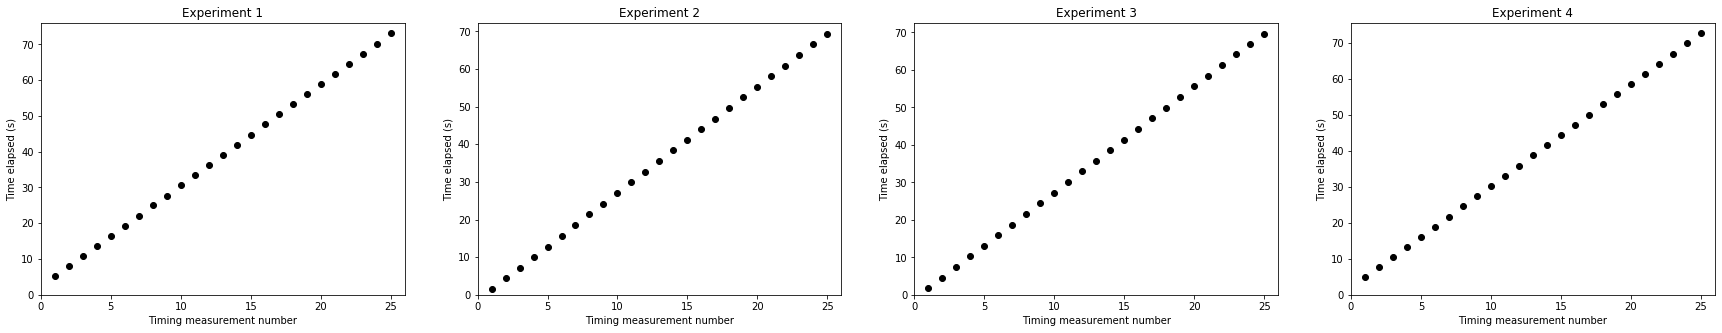

In [6]:
# Plotting raw data
sig_t = 0.05     # Set your own values...
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 5), sharex=True)
ax[0].errorbar(n1, t1, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number')
ax[0].set_ylabel('Time elapsed (s)')
ax[0].set(xlim=(0, n1[-1]+np.ediff1d(n)[0]), ylim=(0, t1[-1]+np.ediff1d(t)[0]))
ax[0].set_title('Experiment 1')
ax[1].errorbar(n2, t2, yerr=sig_t, color='k', fmt='o')
ax[1].set_xlabel('Timing measurement number')
ax[1].set_ylabel('Time elapsed (s)')
ax[1].set(xlim=(0, n2[-1]+np.ediff1d(n)[0]), ylim=(0, t2[-1]+np.ediff1d(t)[0]))
ax[1].set_title('Experiment 2')
ax[2].errorbar(n3, t3, yerr=sig_t, color='k', fmt='o')
ax[2].set_xlabel('Timing measurement number')
ax[2].set_ylabel('Time elapsed (s)')
ax[2].set(xlim=(0, n3[-1]+np.ediff1d(n)[0]), ylim=(0, t3[-1]+np.ediff1d(t)[0]))
ax[2].set_title('Experiment 3')
ax[3].errorbar(n4, t4, yerr=sig_t, color='k', fmt='o')
ax[3].set_xlabel('Timing measurement number')
ax[3].set_ylabel('Time elapsed (s)')
ax[3].set(xlim=(0, n4[-1]+np.ediff1d(n)[0]), ylim=(0, t4[-1]+np.ediff1d(t)[0]))
ax[3].set_title('Experiment 4')

In [7]:
def fit_function(x, a, b):
    return a * x + b
def linfit(x, y, a0, b0, e):
    if e > 0:
        chi2_object = Chi2Regression(fit_function, x, y, e)
    else:
        chi2_object = Chi2Regression(fit_function, x, y)
    minuit = Minuit(chi2_object, pedantic=False, b=b0, a=a0, print_level=0)
    minuit.migrad();
    minuit_output = [minuit.get_fmin(), minuit.get_param_states()]
    b_fit = minuit.values['b']
    a_fit = minuit.values['a']
    sigma_b_fit = minuit.errors['b']
    sigma_a_fit = minuit.errors['a']
    Nvar = 2
    Ndof_fit = len(x) - Nvar    
    Chi2_fit = minuit.fval                          # The chi2 value
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom
    return a_fit, b_fit, sigma_a_fit, sigma_b_fit, Chi2_fit, Prob_fit
error = 0.045
fit1 = linfit(n1, t1, 2.8, 0.0, error)
fit2 = linfit(n2, t2, 2.8, 0.0, error)
fit3 = linfit(n3, t3, 2.8, 0.0, error)
fit4 = linfit(n4, t4, 2.8, 0.0, error)
print(fit1)
print(fit2)
print(fit3)
print(fit4)

(2.8315286153847383, 2.3204520000019935, 0.0012480753905171498, 0.01855397419169722, 15.204079559354604, 0.8871702947560708)
(2.8256356153846043, -1.2438310000000938, 0.001248075646119143, 0.018553978722492412, 21.5493458803417, 0.5475776721102168)
(2.832714538461283, -1.0489130000056652, 0.0012480752363051176, 0.0185539727778418, 34.063422628680435, 0.06424668144234283)
(2.8271801538461023, 1.997045999999239, 0.0012480753101461, 0.01855397246403505, 26.94253549097976, 0.25842093305465547)


In [8]:
def res(n, t, fit):
    t1_fit = fit[0] * n + fit[1]
    residual = t1_fit - t
    print(f"The fit gave: T = {fit[0]:.4f} +- {residual.std()/np.sqrt(len(t)):.4f} seconds with a Chi2 = {fit[4]:.4f} and P = {fit[5]:.4f}")
    return t1_fit, residual
t1_res = res(n1, t1, fit1)[1]
t2_res = res(n2, t2, fit2)[1]
t3_res = res(n3, t3, fit3)[1]
t4_res = res(n4, t4, fit4)[1]

The fit gave: T = 2.8315 +- 0.0070 seconds with a Chi2 = 15.2041 and P = 0.8872
The fit gave: T = 2.8256 +- 0.0084 seconds with a Chi2 = 21.5493 and P = 0.5476
The fit gave: T = 2.8327 +- 0.0105 seconds with a Chi2 = 34.0634 and P = 0.0642
The fit gave: T = 2.8272 +- 0.0093 seconds with a Chi2 = 26.9425 and P = 0.2584


Text(0.62, 0.95, ' Entries     25 \n Mean    -0.000 \n RMS      0.048')

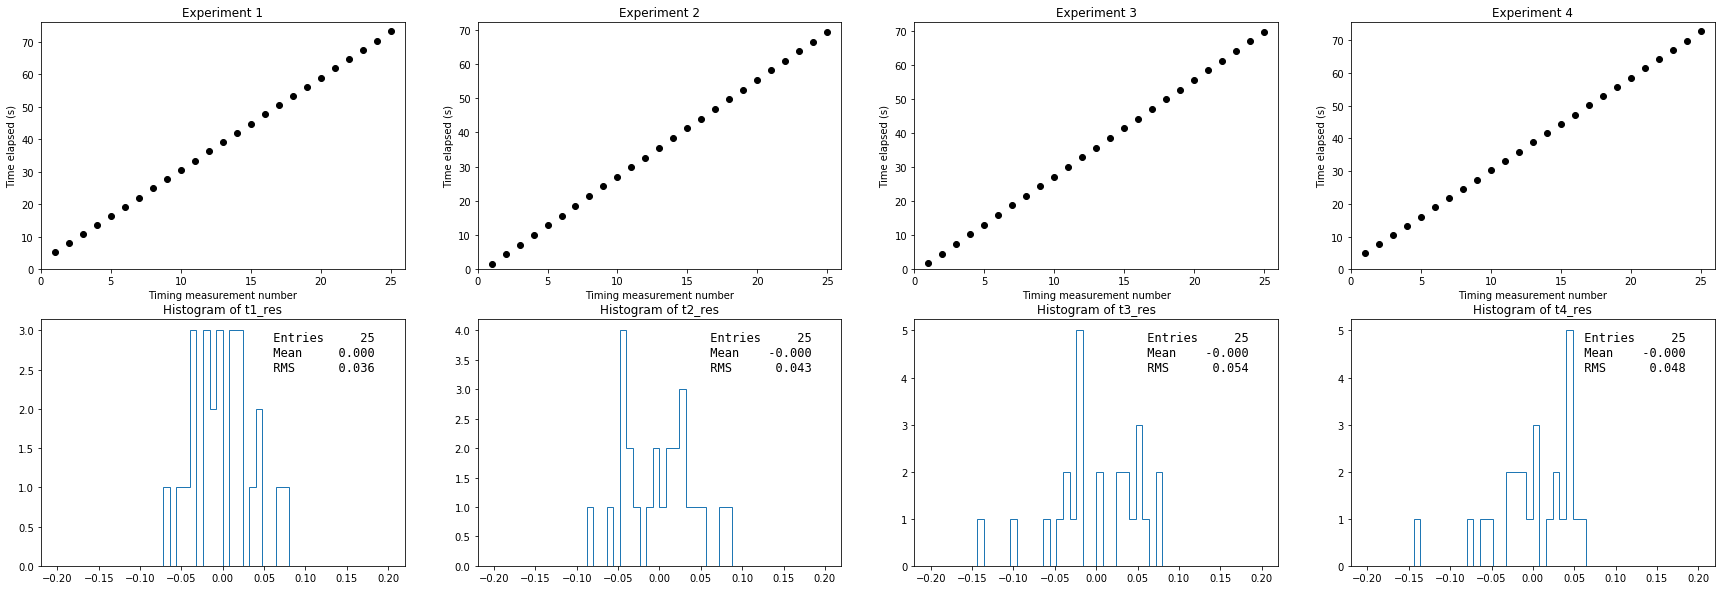

In [9]:
# Plotting raw data
sig_t = 0.05     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), sharex=False)
ax[0,0].errorbar(n1, t1, yerr=sig_t, color='k', fmt='o')
ax[0,0].set_xlabel('Timing measurement number')
ax[0,0].set_ylabel('Time elapsed (s)')
ax[0,0].set(xlim=(0, n1[-1]+np.ediff1d(n)[0]), ylim=(0, t1[-1]+np.ediff1d(t)[0]))
ax[0,0].set_title('Experiment 1')
ax[1,0].hist(t1_res, bins=50,range=(-0.2, 0.2), histtype='step')
ax[1,0].set_title('Histogram of t1_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t1_res), t1_res.mean(), t1_res.std(ddof=1))
ax[1,0].text(0.62, 0.95, string, family='monospace', transform=ax[1,0].transAxes, fontsize=12, verticalalignment='top')
ax[0,1].errorbar(n2, t2, yerr=sig_t, color='k', fmt='o')
ax[0,1].set_xlabel('Timing measurement number')
ax[0,1].set_ylabel('Time elapsed (s)')
ax[0,1].set(xlim=(0, n2[-1]+np.ediff1d(n)[0]), ylim=(0, t2[-1]+np.ediff1d(t)[0]))
ax[0,1].set_title('Experiment 2')
ax[1,1].hist(t2_res, bins=50, range=(-0.2, 0.2), histtype='step')
ax[1,1].set_title('Histogram of t2_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t2_res), t2_res.mean(), t2_res.std(ddof=1))
ax[1,1].text(0.62, 0.95, string, family='monospace', transform=ax[1,1].transAxes, fontsize=12, verticalalignment='top')
ax[0,2].errorbar(n3, t3, yerr=sig_t, color='k', fmt='o')
ax[0,2].set_xlabel('Timing measurement number')
ax[0,2].set_ylabel('Time elapsed (s)')
ax[0,2].set(xlim=(0, n3[-1]+np.ediff1d(n)[0]), ylim=(0, t3[-1]+np.ediff1d(t)[0]))
ax[0,2].set_title('Experiment 3')
ax[1,2].hist(t3_res, bins=50, range=(-0.2, 0.2), histtype='step')
ax[1,2].set_title('Histogram of t3_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t3_res), t3_res.mean(), t3_res.std(ddof=1))
ax[1,2].text(0.62, 0.95, string, family='monospace', transform=ax[1,2].transAxes, fontsize=12, verticalalignment='top')
ax[0,3].errorbar(n4, t4, yerr=sig_t, color='k', fmt='o')
ax[0,3].set_xlabel('Timing measurement number')
ax[0,3].set_ylabel('Time elapsed (s)')
ax[0,3].set(xlim=(0, n4[-1]+np.ediff1d(n)[0]), ylim=(0, t4[-1]+np.ediff1d(t)[0]))
ax[0,3].set_title('Experiment 4')
ax[1,3].hist(t4_res, bins=50, range=(-0.2, 0.2), histtype='step')
ax[1,3].set_title('Histogram of t4_res')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(t4_res), t4_res.mean(), t4_res.std(ddof=1))
ax[1,3].text(0.62, 0.95, string, family='monospace', transform=ax[1,3].transAxes, fontsize=12, verticalalignment='top')

Text(0.62, 0.95, ' Entries    100 \n Mean    -0.000 \n RMS      0.045')

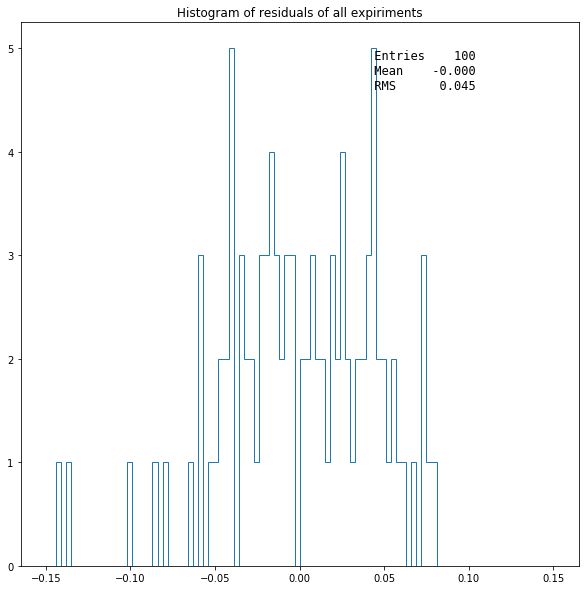

In [10]:
res_all = np.concatenate((t1_res, t2_res, t3_res, t4_res))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharex=False)
ax.hist(res_all, bins=100, range=(-0.15, 0.15), histtype='step')
ax.set_title('Histogram of residuals of all expiriments')
string = " Entries {:>6} \n Mean {:>9.3f} \n RMS {:>10.3f}".format(len(res_all), res_all.mean(), res_all.std(ddof=1))
ax.text(0.62, 0.95, string, family='monospace', transform=ax.transAxes, fontsize=12, verticalalignment='top')

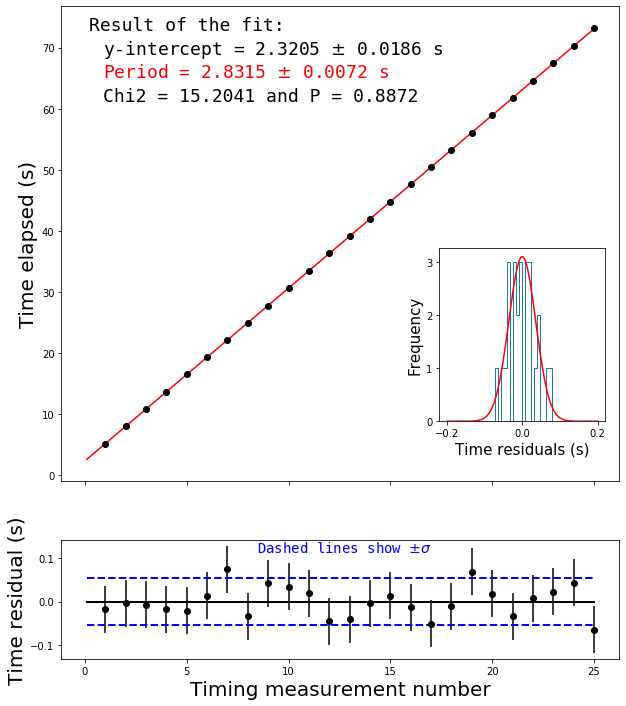

In [11]:
#Make the nice plot 
sig_t = 0.054
fig, ax = plt.subplots(nrows=2, figsize=(10, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
#scatter the points
ax[0].errorbar(n1, t1, yerr=sig_t, color='k', fmt='o')
#plot the fit
x = np.linspace(0.1, 25.0, 500)
y = fit1[0] * x + fit1[1]
ax[0].plot(x, y, color='r')
#plot residual with error
ax[1].errorbar(n1, t1_res, yerr=sig_t, color='k', fmt='o')
y_line = np.zeros(len(x))
ax[1].plot(x, y_line, linewidth=2, color='k')
ax[1].plot(x, y_line-sig_t, linewidth=2, color='b', linestyle='--')
ax[1].plot(x, y_line+sig_t, linewidth=2, color='b',linestyle='--')

#add histogram
N_bins = 50
def gauss_pdf(x, mu, sigma):
    """Normalized Gaussian"""
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2)
def gauss_extended(x, N, mu, sigma) :
    """Non-normalized Gaussian"""
    return N * gauss_pdf(x, mu, sigma)
left, bottom, width, height = [0.65, 0.4, 0.23, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.hist(t1_res, bins=N_bins,range=(-0.2, 0.2), histtype='step')
xhist = np.linspace(-0.2, 0.2, 500)
yhist = gauss_extended(xhist, ((np.max(t1_res)-np.min(t1_res))/25.0)*N_bins, t1_res.mean(), t1_res.std(ddof=1))
ax2.plot(xhist, yhist, color='r')

#set titles
font = 20
ax[0].set_ylabel('Time elapsed (s)', fontsize=font)
ax[1].set_xlabel('Timing measurement number', fontsize=font)
ax[1].set_ylabel('Time residual (s)', fontsize=font)
ax2.set_xlabel('Time residuals (s)', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)

mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)

#Set text
string = f"Result of the fit:"
string2 = f"y-intercept = {fit1[1]:.4f} " + r"$\pm$ " + f"{fit1[3]:.4f} s"
string3 = f"Period = {fit1[0]:.4f} " + r"$\pm$ " + f"{t1_res.std()/np.sqrt(len(t1)-1):.4f} s"
string4 = f"Chi2 = {fit1[4]:.4f} and P = {fit1[5]:.4f}"
ax[0].text(0.05, 0.95, string, family='monospace', color='k', transform=ax[0].transAxes, fontsize=18)
ax[0].text(0.075, 0.90, string2, family='monospace', color='k', transform=ax[0].transAxes, fontsize=18)
ax[0].text(0.075, 0.85, string3, family='monospace', color='r', transform=ax[0].transAxes, fontsize=18)
ax[0].text(0.075, 0.80, string4, family='monospace', color='k', transform=ax[0].transAxes, fontsize=18)
string = f"Dashed lines show " r"$\pm$" + r"$\sigma$"
ax[1].text(0.35, 0.90, string, family='monospace', color='b', transform=ax[1].transAxes, fontsize=14)

plt.savefig('t1_figur.pdf', format='pdf', dpi=1000)

In [12]:
#Calculate lengths
L_weigth = 0.5*np.array([25.95, 25.77, 25.92, 25.71])*10**(-3.0) #in mm
e_weigth = (0.02)*10**(-3.0) #in mm

L_laser = np.array([198.7, 198.4, 198.6, 198.2])*10**(-2.0) + L_weigth #in cm
e_laser = np.sqrt((0.1*10**(-2.0))**2 + e_weigth**2)

L_tom = np.array([198.79, 198.81, 198.82, 198.79])*10**(-2.0) + L_weigth
e_tom = np.sqrt((np.std(np.array([198.79, 198.81, 198.82, 198.79]))*10**(-2.0))**2 + e_weigth**2)

L_tom2 = np.array([198.75, 198.74, 198.68, 198.65])*10**(-2.0) + L_weigth
e_tom2 = np.sqrt((np.std(np.array([198.75, 198.74, 198.68, 198.65]))*10**(-2.0))**2 + e_weigth**2)

print(L_laser, e_laser)
print(L_tom, e_tom)
print(L_tom2, e_tom2)

L = (L_tom/(e_tom**2.0) + L_tom2/(e_tom2**2) + L_laser/(e_laser**2))/(1/e_tom**2 + 1/e_tom2**2 + 1/e_laser**2)
e = np.sqrt(1.0/(1/e_tom**2 + 1/e_tom2**2 + 1/e_laser**2))
print(L, e)

#Calculate g's
T = np.array([2.8315, 2.8256, 2.8327, 2.8272])
e_T = np.array([0.0072, 0.0085, 0.0107, 0.0095])



g_uncom = L * (2*np.pi/T)**2.0
e_uncom = np.sqrt((2*np.pi/T)**4 * e**2 + (-2*L*((2*np.pi)**2/(T**3)))**2 *e_T**2)
g_com = np.sum(g_uncom/e_uncom**2)/np.sum(1/e_uncom**2)
e_com = 1/np.sum(1/e_uncom**2)
print(g_com, e_com)
print(g_uncom, e_uncom)

#
L_mean = np.sum(L/e**2)/(4/e**2)
e_L = e/2
print(L_mean, e_L)
T_mean = np.sum(T/e_T**2)/np.sum(1/e_T**2)
e_T = np.sqrt(1/np.sum(1/e_T**2))
print(T_mean, e_T)
g =  L_mean * (2*np.pi/T_mean)**2.0
e_g = np.sqrt(((np.pi*2)/T_mean)**4 * e_L**2 + (-2*L_mean*((np.pi*2)**2/T_mean**3))**2 * e_T**2)
print(g, e_g)

print("Chisquares")
print("T:", stats.chisquare(T))
print("L:", stats.chisquare(L))
print("g:", stats.chisquare(g_uncom))

[1.999975 1.996885 1.99896  1.994855] 0.001000199980003999
[2.000875 2.000985 2.00116  2.000755] 0.00013143439428096754
[2.000475 2.000285 1.99976  1.999355] 0.00041581245772582593
[2.00082532 2.00085902 2.00100079 2.0005386 ] 0.00012435040152518296
9.867697074116705 0.0009191076284821918
[9.85225805 9.89361174 9.84477583 9.8808341 ] [0.05010881 0.05952731 0.07437615 0.0664063 ]
2.0008059313557247 6.217520076259148e-05
2.8292557172059642 0.004345950355682803
9.867799089540288 0.030316919417268762
Chisquares
T: Power_divergenceResult(statistic=1.2190509852434391e-05, pvalue=0.9999999886799062)
L: Power_divergenceResult(statistic=5.629276153227217e-08, pvalue=0.9999999999964478)
g: Power_divergenceResult(statistic=0.00016293068070563591, pvalue=0.9999994469022563)


In [13]:
g1 = np.array([9.821, 9.827, 9.771])
eg = np.array([0.005, 0.007, 0.006])

def chi2(x, error):
    ndof = len(x) - 1
    chi2 = np.sum((x - np.mean(x))**2/(error)**2)
    print(chi2)
    p = stats.chi2.sf(chi2, ndof)
    print(stats.chi2.sf(chi2, ndof))
    return chi2, p
print('Chi2 of four g')
chi2(g_uncom, e_uncom)

print('Chi2 of four L')
chi2(L, e)

print('Chi2 of four T')
chi2(T, e_T)

Chi2 of four g
0.4185966624567382
0.936374626906448
Chi2 of four L
7.283885940781449
0.06337925104564174
Chi2 of four T
1.8260962824405993
0.6092726247537101


(1.8260962824405993, 0.6092726247537101)

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian, and from the RMS what your (typical) uncert